
XGBoost Results


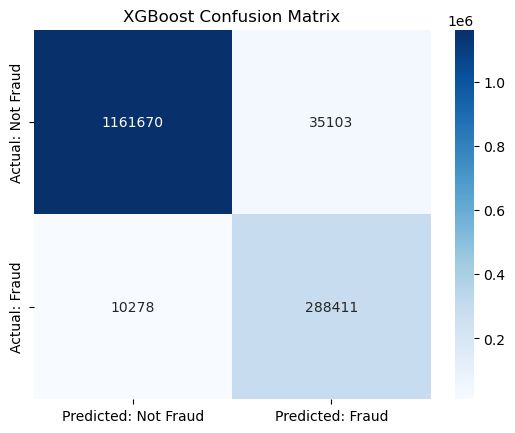


Classification Report (XGBoost):
              precision    recall  f1-score   support

   Not Fraud       0.99      0.97      0.98   1196773
       Fraud       0.89      0.97      0.93    298689

    accuracy                           0.97   1495462
   macro avg       0.94      0.97      0.95   1495462
weighted avg       0.97      0.97      0.97   1495462

ROC AUC Score (XGBoost): 0.995559


In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Load encoded data
# -----------------------------
df_train = pd.read_csv('fraud_data_lgbm_xgb_train.csv')
df_test = pd.read_csv('fraud_data_lgbm_xgb_test.csv')

X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']

X_test = df_test.drop(columns=['is_fraud'])
y_test = df_test['is_fraud']

# -----------------------------
# Handle class imbalance
# -----------------------------
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# -----------------------------
# Train XGBoost
# -----------------------------
model_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',      
    random_state=42
)

model_xgb.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = model_xgb.predict(X_test)
y_proba = model_xgb.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation
# -----------------------------
print("\nXGBoost Results")

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    pd.DataFrame(
        cm,
        index=['Actual: Not Fraud', 'Actual: Fraud'],
        columns=['Predicted: Not Fraud', 'Predicted: Fraud']
    ),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("XGBoost Confusion Matrix")
plt.show()

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score (XGBoost): {roc_auc:.6f}")

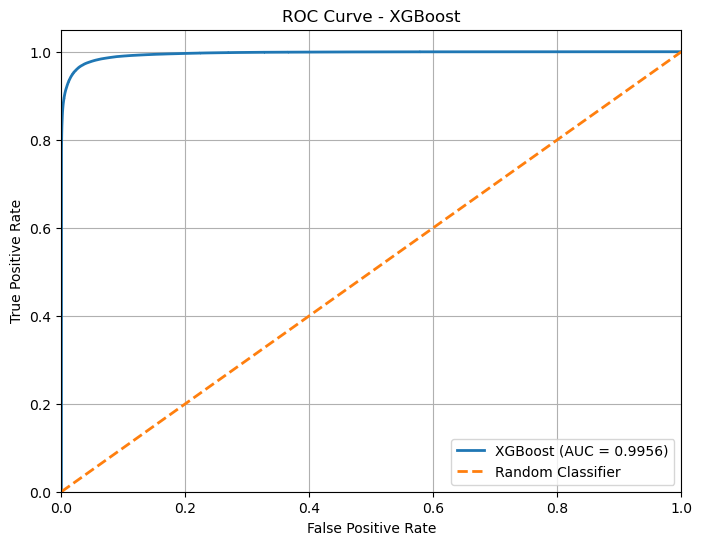

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Fraud = 1)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_proba_xgb)

# Compute AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_xgb,
    tpr_xgb,
    lw=2,
    label=f'XGBoost (AUC = {roc_auc_xgb:.4f})'
)
plt.plot(
    [0, 1],
    [0, 1],
    lw=2,
    linestyle='--',
    label='Random Classifier'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[LightGBM] [Info] Number of positive: 1194757, number of negative: 4787087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.218101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1343
[LightGBM] [Info] Number of data points in the train set: 5981844, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

LightGBM Results


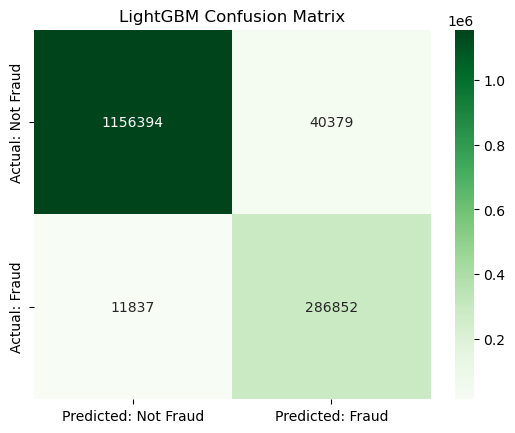


Classification Report (LightGBM):
              precision    recall  f1-score   support

   Not Fraud       0.99      0.97      0.98   1196773
       Fraud       0.88      0.96      0.92    298689

    accuracy                           0.97   1495462
   macro avg       0.93      0.96      0.95   1495462
weighted avg       0.97      0.97      0.97   1495462

ROC AUC Score (LightGBM): 0.994044


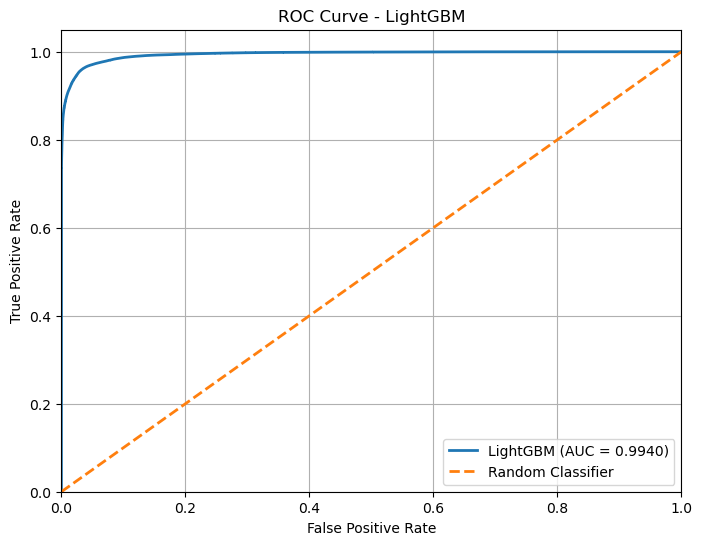

In [6]:
import lightgbm as lgb
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
import seaborn as sns
import matplotlib.pyplot as plt

X_train_lgb = X_train
y_train_lgb = y_train

X_test_lgb = X_test
y_test_lgb = y_test

# -----------------------------
# Train LightGBM
# -----------------------------
model_lgb = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model_lgb.fit(X_train_lgb, y_train_lgb)

# -----------------------------
# Predictions
# -----------------------------
y_pred_lgb = model_lgb.predict(X_test_lgb)
y_proba_lgb = model_lgb.predict_proba(X_test_lgb)[:, 1]

# -----------------------------
# Evaluation
# -----------------------------
print("\nLightGBM Results")

cm = confusion_matrix(y_test_lgb, y_pred_lgb)

sns.heatmap(
    pd.DataFrame(
        cm,
        index=['Actual: Not Fraud', 'Actual: Fraud'],
        columns=['Predicted: Not Fraud', 'Predicted: Fraud']
    ),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("LightGBM Confusion Matrix")
plt.show()

print("\nClassification Report (LightGBM):")
print(classification_report(y_test_lgb, y_pred_lgb, target_names=['Not Fraud', 'Fraud']))

roc_auc_lgb = roc_auc_score(y_test_lgb, y_proba_lgb)
print(f"ROC AUC Score (LightGBM): {roc_auc_lgb:.6f}")

# -----------------------------
# ROC Curve
# -----------------------------
fpr_lgb, tpr_lgb, _ = roc_curve(y_test_lgb, y_proba_lgb)
roc_auc_lgb_curve = auc(fpr_lgb, tpr_lgb)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_lgb,
    tpr_lgb,
    lw=2,
    label=f'LightGBM (AUC = {roc_auc_lgb_curve:.4f})'
)
plt.plot(
    [0, 1],
    [0, 1],
    lw=2,
    linestyle='--',
    label='Random Classifier'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()